In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('C:/Users/carlo/Desktop/Machine Learning/VBA Excel/salesdata.csv')

In [4]:
df.head()

,Order Date,Customer Name,State,Category,Sub-Category,Product Name,Sales,Quantity,Profit
0,03-01-2014,Darren Powers,Texas,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.45,2,5.55
1,04-01-2014,Phillina Ober,Illinois,Office Supplies,Labels,Avery 508,11.78,3,4.27
2,04-01-2014,Phillina Ober,Illinois,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.74,3,-64.77
3,04-01-2014,Phillina Ober,Illinois,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.54,2,-5.49
4,05-01-2014,Mick Brown,Pennsylvania,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.54,3,4.88


In [5]:
df.tail()

,Order Date,Customer Name,State,Category,Sub-Category,Product Name,Sales,Quantity,Profit
9989,30-12-2017,Patrick O'Donnell,New York,Technology,Phones,Gear Head AU3700S Headset,90.93,7,2.73
9990,30-12-2017,Patrick O'Donnell,New York,Office Supplies,Binders,Wilson Jones Legal Size Ring Binders,52.78,3,19.79
9991,30-12-2017,Erica Bern,California,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.90,2,4.52
9992,30-12-2017,Erica Bern,California,Office Supplies,Binders,GBC Binding covers,20.72,2,6.48
9993,30-12-2017,Jill Matthias,Colorado,Office Supplies,Fasteners,Bagged Rubber Bands,3.02,3,-0.60


In [10]:
# Converte a coluna 'Order Date' para o tipo 'datetime64[ns]'
#df['Order Date'] = df['Order Date'].astype('datetime64[ns]')
df['Order Date'] = pd.to_datetime(df['Order Date'], format = '%d-%m-%Y')

In [11]:
# Verifica a estrutura dos dados do DataFrame
df.dtypes

Order Date       datetime64[ns]
Customer Name            object
State                    object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Profit                  float64
dtype: object

In [39]:
# Produto mais vendido por categoria
#produto_mais_vendido = df.loc[:, ['Quantity']].groupby(df['Category']).sum()
produto_mais_vendido = produto_mais_vendido.sort_values(by = 'Quantity', ascending = False)
print("O produto mais vendido foi:")
print(produto_mais_vendido)

O produto mais vendido foi:
                 Quantity
Category                 
Office Supplies     22906
Furniture            8028
Technology           6939


In [50]:
# Vendas por mês	
vendas_por_mes = df.groupby(df['Order Date'].dt.to_period('M'))['Quantity'].sum().sort_values(ascending=False)
print(vendas_por_mes)

Order Date
2017-11    1840
2017-12    1723
2017-09    1660
2016-12    1414
2016-11    1406
2016-09    1316
2015-11    1310
2014-11    1219
2015-12    1203
2017-10    1133
2015-09    1086
2014-12    1079
2014-09    1000
2017-06     931
2017-05     887
2017-03     885
2017-08     884
2016-05     863
2017-07     840
2016-10     767
2016-07     758
2016-06     742
2017-04     733
2016-08     693
2016-04     635
2015-10     631
2014-08     609
2015-08     598
2017-01     597
2014-03     585
2016-03     579
2015-05     575
2014-10     573
2015-07     557
2014-07     550
2015-04     543
2014-04     536
2014-06     521
2015-03     515
2015-06     486
2014-05     466
2017-02     363
2016-01     358
2016-02     306
2014-01     284
2015-02     239
2015-01     236
2014-02     159
Freq: M, Name: Quantity, dtype: int64


In [52]:
# Vendas por ano
vendas_por_ano = df.groupby(df['Order Date'].dt.to_period('Y'))['Quantity'].sum().sort_values(ascending=False)
print(vendas_por_ano)

Order Date
2017    12476
2016     9837
2015     7979
2014     7581
Freq: Y-DEC, Name: Quantity, dtype: int64


In [75]:
# Vendas por trimestre
vendas_por_trimestre = df.groupby(df['Order Date'].dt.to_period('Q'))['Quantity'].sum().sort_values(ascending=False)
print(vendas_por_trimestre)


Order Date
2017Q4    4696
2016Q4    3587
2017Q3    3384
2015Q4    3144
2014Q4    2871
2016Q3    2767
2017Q2    2551
2015Q3    2241
2016Q2    2240
2014Q3    2159
2017Q1    1845
2015Q2    1604
2014Q2    1523
2016Q1    1243
2014Q1    1028
2015Q1     990
Freq: Q-DEC, Name: Quantity, dtype: int64


In [63]:
# Lucro por ano
lucro_por_ano = df.groupby(df['Order Date'].dt.to_period('Y'))['Profit'].sum().sort_values(ascending=False)
print(lucro_por_ano)

Order Date
2017    93439.77
2016    81795.27
2015    61618.69
2014    49544.06
Freq: Y-DEC, Name: Profit, dtype: float64


In [65]:
# Lucro por categoria
lucro_por_categoria = df.groupby(df['Category'])['Profit'].sum().sort_values(ascending=False)
print(lucro_por_categoria)

Category
Technology         145455.66
Office Supplies    122490.88
Furniture           18451.25
Name: Profit, dtype: float64


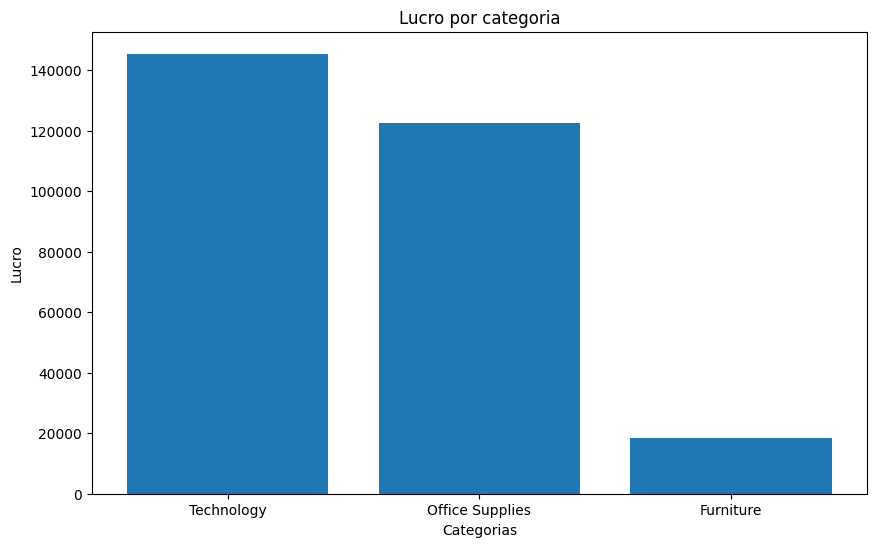

In [73]:
# Gráfico de lucro por categoria
plt.figure(figsize=(10, 6))
plt.bar(lucro_por_categoria.index, lucro_por_categoria.values)
plt.title('Lucro por categoria')
plt.xlabel('Categorias')
plt.ylabel('Lucro')
plt.show()

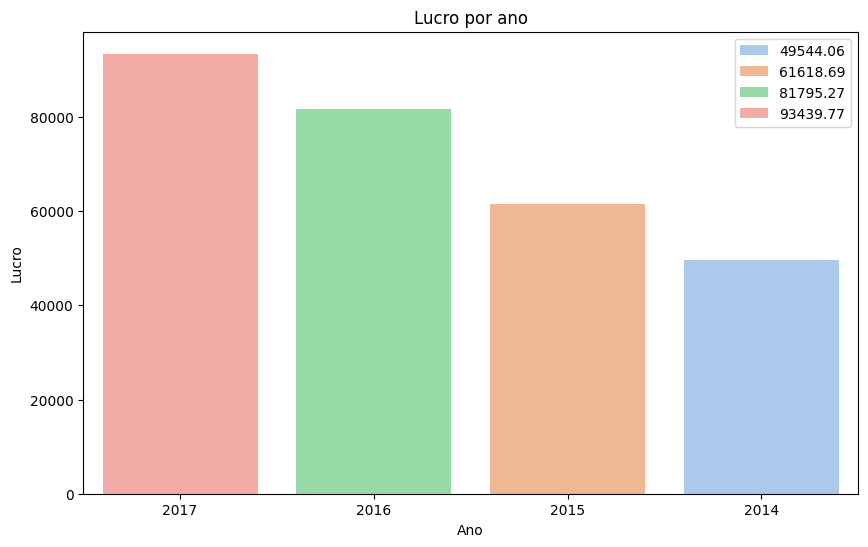

In [98]:
#Gráfico do lucro por ano
plt.figure(figsize=(10, 6))
sns.barplot(x=lucro_por_ano.index, y=lucro_por_ano.values, palette='pastel', hue=lucro_por_ano.values)
plt.title('Lucro por ano')
plt.xlabel('Ano')
plt.ylabel('Lucro')
plt.show();

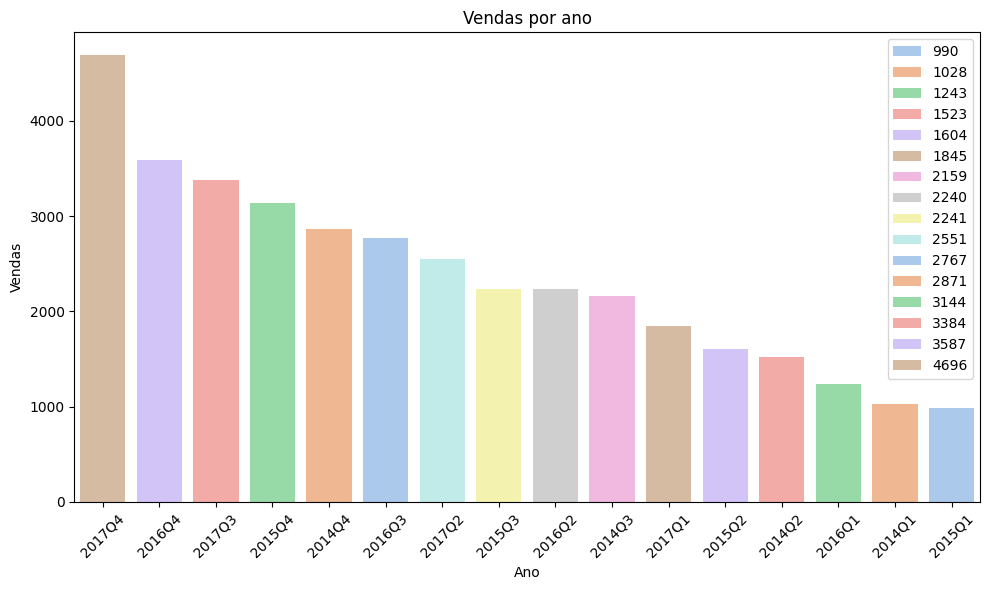

In [96]:
# Gráfico de vendas por trimestre anual
plt.figure(figsize=(10, 6))
sns.barplot(x=vendas_por_ano.index, y=vendas_por_ano.values, palette='pastel', hue=vendas_por_ano.values)
plt.title('Vendas por ano')
plt.xlabel('Ano')
plt.ylabel('Vendas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Modelo de previsão das vendas